In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt
import itertools

In [31]:
#  Read data from the CSV into a dataframe
folder='data/'

raw_data_1 = pd.read_csv(folder +'2007-2008.csv')
raw_data_2 = pd.read_csv(folder +'2008-2009.csv')
raw_data_3 = pd.read_csv(folder +'2009-2010.csv')
raw_data_4 = pd.read_csv(folder +'2010-2011.csv')
raw_data_5 = pd.read_csv(folder +'2011-2012.csv')
raw_data_6 = pd.read_csv(folder +'2012-2013.csv')
raw_data_7 = pd.read_csv(folder +'2013-2014.csv')
raw_data_8 = pd.read_csv(folder +'2014-2015.csv')
raw_data_9 = pd.read_csv(folder +'2015-2016.csv')   
raw_data_10 = pd.read_csv(folder +'2016-2017.csv')
raw_data_11 = pd.read_csv(folder +'2017-2018.csv')
raw_data_12 = pd.read_csv(folder +'2018-2019.csv')
raw_data_13 = pd.read_csv(folder +'2019-2020.csv')
raw_data_14 = pd.read_csv(folder +'2020-2021.csv')
raw_data_15 = pd.read_csv(folder +'2021-2022.csv')
raw_data_16 = pd.read_csv(folder +'2022-2023.csv')
raw_data_17 = pd.read_csv(folder +'2023-2024.csv')
raw_data_18 = pd.read_csv(folder +'2024-2025.csv')

In [33]:
#Gets all the statistics related to gameplay
                      
columns_req = ['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR']

playing_statistics_1 = raw_data_1[columns_req]                      
playing_statistics_2 = raw_data_2[columns_req]
playing_statistics_3 = raw_data_3[columns_req]
playing_statistics_4 = raw_data_4[columns_req]
playing_statistics_5 = raw_data_5[columns_req]
playing_statistics_6 = raw_data_6[columns_req]
playing_statistics_7 = raw_data_7[columns_req]
playing_statistics_8 = raw_data_8[columns_req]
playing_statistics_9 = raw_data_9[columns_req]
playing_statistics_10 = raw_data_10[columns_req]
playing_statistics_11 = raw_data_11[columns_req]
playing_statistics_12 = raw_data_12[columns_req]
playing_statistics_13 = raw_data_13[columns_req]
playing_statistics_14 = raw_data_14[columns_req]
playing_statistics_15 = raw_data_15[columns_req]
playing_statistics_16 = raw_data_16[columns_req]
playing_statistics_17 = raw_data_17[columns_req]
playing_statistics_18 = raw_data_18[columns_req]

In [34]:
playing_statistics_1.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,11/08/07,Aston Villa,Liverpool,1,2,A
1,11/08/07,Bolton,Newcastle,1,3,A
2,11/08/07,Derby,Portsmouth,2,2,D
3,11/08/07,Everton,Wigan,2,1,H
4,11/08/07,Middlesbrough,Blackburn,1,2,A


#### Calculate cummulative goals scored and goals conceded by each team across matchweeks   

In [35]:
# Creates cumulative goals scored by each team across matchweeks
# Returns a DataFrame where rows = teams, columns = matchweeks (0-38)
# Tracks both home and away goals scored
def get_goals_scored(playing_stat):
    # Create a dictionary with team names as keys
    teams = {}
    for i in playing_stat['HomeTeam'].unique():
        teams[i] = []
    
    # the value corresponding to keys is a list containing the match location.
    for i in range(len(playing_stat)):
        HTGS = playing_stat.iloc[i]['FTHG']
        ATGS = playing_stat.iloc[i]['FTAG']
        teams[playing_stat.iloc[i].HomeTeam].append(HTGS)
        teams[playing_stat.iloc[i].AwayTeam].append(ATGS)
    
    # Create a dataframe for goals scored where rows are teams and cols are matchweek.
    GoalsScored = pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T
    GoalsScored[0] = 0
    # Aggregate to get uptil that point
    for i in range(2,39):
        GoalsScored[i] = GoalsScored[i] + GoalsScored[i-1]
    return GoalsScored



# Creates cumulative goals conceded by each team across matchweeks
# Similar structure to goals scored
# Tracks goals allowed at home and away
def get_goals_conceded(playing_stat):
    # Create a dictionary with team names as keys
    teams = {}
    for i in playing_stat['HomeTeam'].unique():
        teams[i] = []
    
    # the value corresponding to keys is a list containing the match location.
    for i in range(len(playing_stat)):
        ATGC = playing_stat.iloc[i]['FTHG']
        HTGC = playing_stat.iloc[i]['FTAG']
        teams[playing_stat.iloc[i].HomeTeam].append(HTGC)
        teams[playing_stat.iloc[i].AwayTeam].append(ATGC)
    
    # Create a dataframe for goals scored where rows are teams and cols are matchweek.
    GoalsConceded = pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T
    GoalsConceded[0] = 0
    # Aggregate to get uptil that point
    for i in range(2,39):
        GoalsConceded[i] = GoalsConceded[i] + GoalsConceded[i-1]
    return GoalsConceded


# get_gss() (Get Goals Scored/Conceded Statistics)

# Main function that adds 4 new columns to each match record:
# HTGS: Home Team Goals Scored (cumulative before this match)
# ATGS: Away Team Goals Scored (cumulative before this match)
# HTGC: Home Team Goals Conceded (cumulative before this match)
# ATGC: Away Team Goals Conceded (cumulative before this match)
def get_gss(playing_stat):
    GC = get_goals_conceded(playing_stat)
    GS = get_goals_scored(playing_stat)

    print(len(playing_stat))
   
    j = 0
    HTGS = []
    ATGS = []
    HTGC = []
    ATGC = []

    for i in range(len(playing_stat)):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HTGS.append(GS.loc[ht][j])
        ATGS.append(GS.loc[at][j])
        HTGC.append(GC.loc[ht][j])
        ATGC.append(GC.loc[at][j])
        
        if ((i + 1)% 10) == 0:
            j = j + 1
        
    playing_stat['HTGS'] = HTGS
    playing_stat['ATGS'] = ATGS
    playing_stat['HTGC'] = HTGC
    playing_stat['ATGC'] = ATGC
    
    return playing_stat




In [36]:
len(playing_statistics_8)

380

In [37]:
# Apply to each dataset
playing_statistics_1 = get_gss(playing_statistics_1)
playing_statistics_2 = get_gss(playing_statistics_2)
playing_statistics_3 = get_gss(playing_statistics_3)
playing_statistics_4 = get_gss(playing_statistics_4)
playing_statistics_5 = get_gss(playing_statistics_5)
playing_statistics_6 = get_gss(playing_statistics_6)
playing_statistics_7 = get_gss(playing_statistics_7)
playing_statistics_8 = get_gss(playing_statistics_8)
playing_statistics_9 = get_gss(playing_statistics_9)
playing_statistics_10 = get_gss(playing_statistics_10)
playing_statistics_11 = get_gss(playing_statistics_11)
playing_statistics_12 = get_gss(playing_statistics_12)
playing_statistics_13 = get_gss(playing_statistics_13)
playing_statistics_14 = get_gss(playing_statistics_14)
playing_statistics_15 = get_gss(playing_statistics_15)
playing_statistics_16 = get_gss(playing_statistics_16)
playing_statistics_17 = get_gss(playing_statistics_17)
playing_statistics_18 = get_gss(playing_statistics_18)

380


/tmp/ipykernel_10131/2530086378.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTGS'] = HTGS
/tmp/ipykernel_10131/2530086378.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATGS'] = ATGS
/tmp/ipykernel_10131/2530086378.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

380


/tmp/ipykernel_10131/2530086378.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTGS'] = HTGS
/tmp/ipykernel_10131/2530086378.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATGS'] = ATGS
/tmp/ipykernel_10131/2530086378.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

380


/tmp/ipykernel_10131/2530086378.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTGS'] = HTGS
/tmp/ipykernel_10131/2530086378.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATGS'] = ATGS
/tmp/ipykernel_10131/2530086378.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

380


/tmp/ipykernel_10131/2530086378.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTGS'] = HTGS
/tmp/ipykernel_10131/2530086378.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATGS'] = ATGS
/tmp/ipykernel_10131/2530086378.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

380


/tmp/ipykernel_10131/2530086378.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTGS'] = HTGS
/tmp/ipykernel_10131/2530086378.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATGS'] = ATGS
/tmp/ipykernel_10131/2530086378.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

380


/tmp/ipykernel_10131/2530086378.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTGS'] = HTGS
/tmp/ipykernel_10131/2530086378.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATGS'] = ATGS
/tmp/ipykernel_10131/2530086378.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

380


/tmp/ipykernel_10131/2530086378.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTGS'] = HTGS
/tmp/ipykernel_10131/2530086378.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATGS'] = ATGS
/tmp/ipykernel_10131/2530086378.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

380


/tmp/ipykernel_10131/2530086378.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTGS'] = HTGS
/tmp/ipykernel_10131/2530086378.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATGS'] = ATGS
/tmp/ipykernel_10131/2530086378.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

380


/tmp/ipykernel_10131/2530086378.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTGS'] = HTGS
/tmp/ipykernel_10131/2530086378.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATGS'] = ATGS
/tmp/ipykernel_10131/2530086378.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

380


/tmp/ipykernel_10131/2530086378.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTGS'] = HTGS
/tmp/ipykernel_10131/2530086378.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATGS'] = ATGS
/tmp/ipykernel_10131/2530086378.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

380


/tmp/ipykernel_10131/2530086378.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTGS'] = HTGS
/tmp/ipykernel_10131/2530086378.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATGS'] = ATGS
/tmp/ipykernel_10131/2530086378.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

380


/tmp/ipykernel_10131/2530086378.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTGS'] = HTGS
/tmp/ipykernel_10131/2530086378.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATGS'] = ATGS
/tmp/ipykernel_10131/2530086378.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

380


/tmp/ipykernel_10131/2530086378.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTGS'] = HTGS
/tmp/ipykernel_10131/2530086378.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATGS'] = ATGS
/tmp/ipykernel_10131/2530086378.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

380


/tmp/ipykernel_10131/2530086378.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTGS'] = HTGS
/tmp/ipykernel_10131/2530086378.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATGS'] = ATGS
/tmp/ipykernel_10131/2530086378.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

380


/tmp/ipykernel_10131/2530086378.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTGS'] = HTGS
/tmp/ipykernel_10131/2530086378.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATGS'] = ATGS
/tmp/ipykernel_10131/2530086378.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

380


/tmp/ipykernel_10131/2530086378.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTGS'] = HTGS
/tmp/ipykernel_10131/2530086378.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATGS'] = ATGS
/tmp/ipykernel_10131/2530086378.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

380


/tmp/ipykernel_10131/2530086378.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTGS'] = HTGS
/tmp/ipykernel_10131/2530086378.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATGS'] = ATGS
/tmp/ipykernel_10131/2530086378.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

380


/tmp/ipykernel_10131/2530086378.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTGS'] = HTGS
/tmp/ipykernel_10131/2530086378.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATGS'] = ATGS
/tmp/ipykernel_10131/2530086378.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [40]:
playing_statistics_15.tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC
375,22/05/2022,Crystal Palace,Man United,1,0,H,49,57,46,56
376,22/05/2022,Leicester,Southampton,4,1,H,58,42,58,63
377,22/05/2022,Liverpool,Wolves,3,1,H,91,37,25,40
378,22/05/2022,Man City,Aston Villa,3,2,H,96,50,24,51
379,22/05/2022,Norwich,Tottenham,0,5,A,23,64,79,40


#### This code calculates cumulative points for teams throughout the season

In [43]:

# Converts match results to points (standard football/soccer scoring):

# 'W' (Win) = 3 points
# 'D' (Draw) = 1 point
# 'L' (Loss) = 0 points
def get_points(result):
    if result == 'W':
        return 3
    elif result == 'D':
        return 1
    else:
        return 0
    

# Converts results to cumulative points:

# Applies get_points() to convert W/D/L to 3/1/0
# Calculates cumulative sum across matchweeks
# Adds column 0 with all zeros (starting point)
# Returns cumulative points for each team by matchweek
def get_cuml_points(matchres):
    matchres_points = matchres.applymap(get_points)
    for i in range(2,39):
        matchres_points[i] = matchres_points[i] + matchres_points[i-1]
        
    matchres_points.insert(column =0, loc = 0, value = [0*i for i in range(20)])
    return matchres_points


# Creates a match result matrix:

# Extracts results from the FTR (Full Time Result) column
# If FTR == 'H': Home team gets 'W', Away team gets 'L'
# If FTR == 'A': Away team gets 'W', Home team gets 'L'
# Otherwise: Both teams get 'D'
# Returns DataFrame where rows = teams, columns = matchweeks (1-38)
def get_matchres(playing_stat):
    # Create a dictionary with team names as keys
    teams = {}
    # Fix: Use .unique() instead of .groupby().mean()
    for i in playing_stat['HomeTeam'].unique():
        teams[i] = []

    # the value corresponding to keys is a list containing the match result
    for i in range(len(playing_stat)):
        if playing_stat.iloc[i].FTR == 'H':
            teams[playing_stat.iloc[i].HomeTeam].append('W')
            teams[playing_stat.iloc[i].AwayTeam].append('L')
        elif playing_stat.iloc[i].FTR == 'A':
            teams[playing_stat.iloc[i].AwayTeam].append('W')
            teams[playing_stat.iloc[i].HomeTeam].append('L')
        else:
            teams[playing_stat.iloc[i].AwayTeam].append('D')
            teams[playing_stat.iloc[i].HomeTeam].append('D')
            
    return pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T


# Adds cumulative points to each match record:

# Creates two new columns:
# HTP: Home Team Points (cumulative before this match)
# ATP: Away Team Points (cumulative before this match)
# Shows each team's league standing going into each match
def get_agg_points(playing_stat):
    matchres = get_matchres(playing_stat)
    cum_pts = get_cuml_points(matchres)
    HTP = []
    ATP = []
    j = 0
    # Fix: Use len(playing_stat) instead of 380
    for i in range(len(playing_stat)):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HTP.append(cum_pts.loc[ht][j])
        ATP.append(cum_pts.loc[at][j])

        if ((i + 1)% 10) == 0:
            j = j + 1
            
    playing_stat['HTP'] = HTP
    playing_stat['ATP'] = ATP
    return playing_stat

In [44]:
# Apply to each dataset
playing_statistics_1 = get_agg_points(playing_statistics_1)
playing_statistics_2 = get_agg_points(playing_statistics_2)
playing_statistics_3 = get_agg_points(playing_statistics_3)
playing_statistics_4 = get_agg_points(playing_statistics_4)
playing_statistics_5 = get_agg_points(playing_statistics_5)
playing_statistics_6 = get_agg_points(playing_statistics_6)
playing_statistics_7 = get_agg_points(playing_statistics_7)
playing_statistics_8 = get_agg_points(playing_statistics_8)
playing_statistics_9 = get_agg_points(playing_statistics_9)
playing_statistics_10 = get_agg_points(playing_statistics_10)
playing_statistics_11 = get_agg_points(playing_statistics_11)
playing_statistics_12 = get_agg_points(playing_statistics_12)
playing_statistics_13 = get_agg_points(playing_statistics_13)
playing_statistics_14 = get_agg_points(playing_statistics_14)
playing_statistics_15 = get_agg_points(playing_statistics_15)
playing_statistics_16 = get_agg_points(playing_statistics_16)
playing_statistics_17 = get_agg_points(playing_statistics_17)
playing_statistics_18 = get_agg_points(playing_statistics_18)

/tmp/ipykernel_10131/1760726368.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  matchres_points = matchres.applymap(get_points)
/tmp/ipykernel_10131/1760726368.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTP'] = HTP
/tmp/ipykernel_10131/1760726368.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATP'] = ATP
/tmp/ipykernel_10131/1760726368.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead

In [45]:
playing_statistics_1.tail(20)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP
360,03/05/08,Aston Villa,Wigan,0,2,A,69,32,47,49,59,37
361,03/05/08,Blackburn,Derby,3,1,H,46,19,43,82,55,11
362,03/05/08,Bolton,Sunderland,2,0,H,33,36,53,56,33,39
363,03/05/08,Fulham,Birmingham,2,0,H,35,42,60,59,30,32
364,03/05/08,Man United,West Ham,4,1,H,74,39,21,44,81,48
365,03/05/08,Middlesbrough,Portsmouth,2,0,H,33,48,52,37,36,57
366,03/05/08,Reading,Tottenham,0,1,A,37,65,65,59,33,43
367,04/05/08,Arsenal,Everton,1,0,H,72,52,31,31,77,62
368,04/05/08,Liverpool,Man City,1,0,H,64,44,28,44,70,55
369,05/05/08,Newcastle,Chelsea,0,2,A,44,62,60,25,43,81


#### This code calculate wining streak for both Home and Away teams before the current schedule match

In [46]:

# Creates a string of past results for each team:

# Gets match results using get_matchres()
# For each matchweek from num onwards, concatenates the last num results
# Example: If num=3, matchweek 5 might show "WWL" (Won, Won, Lost in last 3 games)
# Returns DataFrame with form strings by team and matchweek

def get_form(playing_stat,num):
    form = get_matchres(playing_stat)
    form_final = form.copy()
    for i in range(num,39):
        form_final[i] = ''
        j = 0
        while j < num:
            form_final[i] += form[i-j]
            j += 1           
    return form_final


# Adds form columns to the match data:

# Extracts the most recent result from the last num matches
# Creates two columns:
# HM{num}: Home team's result from num matches ago
# AM{num}: Away team's result from num matches ago
# First num*10 matches get 'M' (Missing) since insufficient history
# Uses past[num-1] to get the oldest result in the window
def add_form(playing_stat,num):
    form = get_form(playing_stat,num)
    h = ['M' for i in range(num * 10)]  # since form is not available for n MW (n*10)
    a = ['M' for i in range(num * 10)]
    
    j = num
    for i in range((num*10),380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        
        past = form.loc[ht][j]               # get past n results
        h.append(past[num-1])                    # 0 index is most recent
        
        past = form.loc[at][j]               # get past n results.
        a.append(past[num-1])                   # 0 index is most recent
        
        if ((i + 1)% 10) == 0:
            j = j + 1

    playing_stat['HM' + str(num)] = h                 
    playing_stat['AM' + str(num)] = a

    
    return playing_stat


# Applies form calculation for 5 different time windows:

# Adds 10 columns total: HM1-5 and AM1-5
# Shows results from 1, 2, 3, 4, and 5 matches ago
# Purpose: Captures momentum/streaks. A team with recent wins (HM1='W', HM2='W') is in better form than one with losses, which helps predict future performance.
def add_form_df(playing_statistics):
    playing_statistics = add_form(playing_statistics,1)
    playing_statistics = add_form(playing_statistics,2)
    playing_statistics = add_form(playing_statistics,3)
    playing_statistics = add_form(playing_statistics,4)
    playing_statistics = add_form(playing_statistics,5)
    return playing_statistics 

In [47]:
# Make changes to df
playing_statistics_1 = add_form_df(playing_statistics_1)
playing_statistics_2 = add_form_df(playing_statistics_2)
playing_statistics_3 = add_form_df(playing_statistics_3)
playing_statistics_4 = add_form_df(playing_statistics_4)
playing_statistics_5 = add_form_df(playing_statistics_5)
playing_statistics_6 = add_form_df(playing_statistics_6)
playing_statistics_7 = add_form_df(playing_statistics_7)
playing_statistics_8 = add_form_df(playing_statistics_8)
playing_statistics_9 = add_form_df(playing_statistics_9)
playing_statistics_10 = add_form_df(playing_statistics_10)
playing_statistics_11 = add_form_df(playing_statistics_11)
playing_statistics_12 = add_form_df(playing_statistics_12)
playing_statistics_13 = add_form_df(playing_statistics_13)
playing_statistics_14 = add_form_df(playing_statistics_14)
playing_statistics_15 = add_form_df(playing_statistics_15)
playing_statistics_16 = add_form_df(playing_statistics_16)
playing_statistics_17 = add_form_df(playing_statistics_17)
playing_statistics_18 = add_form_df(playing_statistics_18)

/tmp/ipykernel_10131/93285606.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HM' + str(num)] = h
/tmp/ipykernel_10131/93285606.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['AM' + str(num)] = a
/tmp/ipykernel_10131/93285606.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [48]:
playing_statistics_1.head(20)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,HM1,AM1,HM2,AM2,HM3,AM3,HM4,AM4,HM5,AM5
0,11/08/07,Aston Villa,Liverpool,1,2,A,0,0,0,0,...,M,M,M,M,M,M,M,M,M,M
1,11/08/07,Bolton,Newcastle,1,3,A,0,0,0,0,...,M,M,M,M,M,M,M,M,M,M
2,11/08/07,Derby,Portsmouth,2,2,D,0,0,0,0,...,M,M,M,M,M,M,M,M,M,M
3,11/08/07,Everton,Wigan,2,1,H,0,0,0,0,...,M,M,M,M,M,M,M,M,M,M
4,11/08/07,Middlesbrough,Blackburn,1,2,A,0,0,0,0,...,M,M,M,M,M,M,M,M,M,M
5,11/08/07,Sunderland,Tottenham,1,0,H,0,0,0,0,...,M,M,M,M,M,M,M,M,M,M
6,11/08/07,West Ham,Man City,0,2,A,0,0,0,0,...,M,M,M,M,M,M,M,M,M,M
7,12/08/07,Arsenal,Fulham,2,1,H,0,0,0,0,...,M,M,M,M,M,M,M,M,M,M
8,12/08/07,Chelsea,Birmingham,3,2,H,0,0,0,0,...,M,M,M,M,M,M,M,M,M,M
9,12/08/07,Man United,Reading,0,0,D,0,0,0,0,...,M,M,M,M,M,M,M,M,M,M


In [49]:
# Rearranging columns
cols = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3',
        'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5' ]

playing_statistics_1 = playing_statistics_1[cols]
playing_statistics_2 = playing_statistics_2[cols]
playing_statistics_3 = playing_statistics_3[cols]
playing_statistics_4 = playing_statistics_4[cols]
playing_statistics_5 = playing_statistics_5[cols]
playing_statistics_6 = playing_statistics_6[cols]
playing_statistics_7 = playing_statistics_7[cols]
playing_statistics_8 = playing_statistics_8[cols]
playing_statistics_9 = playing_statistics_9[cols]
playing_statistics_10 = playing_statistics_10[cols]
playing_statistics_11 = playing_statistics_11[cols]
playing_statistics_12 = playing_statistics_12[cols]
playing_statistics_13 = playing_statistics_13[cols]
playing_statistics_14 = playing_statistics_14[cols]
playing_statistics_15 = playing_statistics_15[cols]
playing_statistics_16 = playing_statistics_16[cols]
playing_statistics_17 = playing_statistics_17[cols]
playing_statistics_18 = playing_statistics_18[cols]

In [50]:
playing_statistics_1.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5
0,11/08/07,Aston Villa,Liverpool,1,2,A,0,0,0,0,...,M,M,M,M,M,M,M,M,M,M
1,11/08/07,Bolton,Newcastle,1,3,A,0,0,0,0,...,M,M,M,M,M,M,M,M,M,M
2,11/08/07,Derby,Portsmouth,2,2,D,0,0,0,0,...,M,M,M,M,M,M,M,M,M,M
3,11/08/07,Everton,Wigan,2,1,H,0,0,0,0,...,M,M,M,M,M,M,M,M,M,M
4,11/08/07,Middlesbrough,Blackburn,1,2,A,0,0,0,0,...,M,M,M,M,M,M,M,M,M,M


#### This code adds a MatchWeek (MW) column to identify which week of the season each match belongs to.

In [51]:
# How it works:

# Assumes 10 matches per matchweek (typical for a 20-team league where each team plays once)
# Iterates through 380 matches (20 teams × 19 opponents × 2 home/away = 380 matches in a season)
# Assigns matchweek numbers:
# Matches 0-9: MW = 1
# Matches 10-19: MW = 2
# Matches 20-29: MW = 3
# ...and so on up to MW 38

def get_mw(playing_stat):
    j = 1
    MatchWeek = []
    for i in range(380):
        MatchWeek.append(j)
        if ((i + 1)% 10) == 0:
            j = j + 1
    playing_stat['MW'] = MatchWeek
    return playing_stat

playing_statistics_1 = get_mw(playing_statistics_1)
playing_statistics_2 = get_mw(playing_statistics_2)
playing_statistics_3 = get_mw(playing_statistics_3)
playing_statistics_4 = get_mw(playing_statistics_4)
playing_statistics_5 = get_mw(playing_statistics_5)
playing_statistics_6 = get_mw(playing_statistics_6)
playing_statistics_7 = get_mw(playing_statistics_7)
playing_statistics_8 = get_mw(playing_statistics_8)
playing_statistics_9 = get_mw(playing_statistics_9)
playing_statistics_10 = get_mw(playing_statistics_10)
playing_statistics_11 = get_mw(playing_statistics_11)
playing_statistics_12 = get_mw(playing_statistics_12)
playing_statistics_13 = get_mw(playing_statistics_13)
playing_statistics_14 = get_mw(playing_statistics_14)
playing_statistics_15 = get_mw(playing_statistics_15)
playing_statistics_16 = get_mw(playing_statistics_16)
playing_statistics_17 = get_mw(playing_statistics_17)
playing_statistics_18 = get_mw(playing_statistics_18)

In [53]:
playing_statistics_18.tail(20)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,MW
360,16/05/2025,Aston Villa,Tottenham,2,0,H,56,63,49,59,...,W,L,W,W,L,D,L,L,L,37
361,16/05/2025,Chelsea,Man United,1,0,H,62,42,43,53,...,W,W,W,D,L,L,D,L,L,37
362,18/05/2025,Everton,Southampton,2,0,H,39,25,44,82,...,D,L,L,W,D,L,L,D,L,37
363,18/05/2025,West Ham,Nott'm Forest,1,2,A,42,56,59,44,...,D,L,D,L,D,D,L,W,L,37
364,18/05/2025,Brentford,Fulham,2,3,A,63,51,53,50,...,W,W,W,D,L,L,W,L,L,37
365,18/05/2025,Leicester,Ipswich,2,0,H,31,35,78,77,...,W,L,L,D,L,D,L,L,D,37
366,18/05/2025,Arsenal,Newcastle,1,0,H,66,68,33,45,...,L,D,W,D,W,D,W,L,W,37
367,19/05/2025,Brighton,Liverpool,3,2,H,59,83,56,37,...,D,W,L,D,D,L,W,W,W,37
368,20/05/2025,Crystal Palace,Wolves,4,2,H,46,51,48,64,...,D,D,D,L,L,L,W,W,W,37
369,20/05/2025,Man City,Bournemouth,3,1,H,67,55,43,43,...,W,W,W,W,L,W,D,D,W,37


In [54]:
playing_stat = pd.concat([
                            playing_statistics_1,
                            playing_statistics_2,
                            playing_statistics_3,
                            playing_statistics_4,
                            playing_statistics_5,
                            playing_statistics_6,
                            playing_statistics_7,
                            playing_statistics_8,
                            playing_statistics_9,
                            playing_statistics_10,
                            playing_statistics_11,
                            playing_statistics_12,
                            playing_statistics_13,
                            playing_statistics_14,
                            playing_statistics_15,
                            playing_statistics_16,
                            playing_statistics_17,
                            playing_statistics_18
                          ], ignore_index=True)

In [55]:
playing_stat

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,MW
0,11/08/07,Aston Villa,Liverpool,1,2,A,0,0,0,0,...,M,M,M,M,M,M,M,M,M,1
1,11/08/07,Bolton,Newcastle,1,3,A,0,0,0,0,...,M,M,M,M,M,M,M,M,M,1
2,11/08/07,Derby,Portsmouth,2,2,D,0,0,0,0,...,M,M,M,M,M,M,M,M,M,1
3,11/08/07,Everton,Wigan,2,1,H,0,0,0,0,...,M,M,M,M,M,M,M,M,M,1
4,11/08/07,Middlesbrough,Blackburn,1,2,A,0,0,0,0,...,M,M,M,M,M,M,M,M,M,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,25/05/2025,Newcastle,Everton,0,1,A,68,41,46,44,...,W,D,W,L,W,W,D,L,L,38
6836,25/05/2025,Nott'm Forest,Chelsea,0,1,A,58,63,45,43,...,D,D,L,W,W,L,W,W,W,38
6837,25/05/2025,Southampton,Arsenal,1,2,A,25,67,84,33,...,D,L,L,D,W,D,L,D,W,38
6838,25/05/2025,Tottenham,Brighton,1,4,A,63,62,61,58,...,L,D,L,L,W,W,D,W,L,38


#### This code creates form-based features by calculating points from recent results and identifying winning/losing streaks.

In [58]:
# get_form_points(string)
# Converts a form string (e.g., "WWLDW") to total points:

# Loops through each letter (W/D/L)
# Sums up points using get_points() (W=3, D=1, L=0)
# Example: "WWLDW" = 3+3+0+1+3 = 10 points

# HTFormPtsStr/ATFormPtsStr: Concatenates last 5 match results into a string
# HTFormPts/ATFormPts: Converts to numeric score (0-15 range)
def get_form_points(string):
    sum = 0
    for letter in string:
        sum += get_points(letter)
    return sum

playing_stat['HTFormPtsStr'] = playing_stat['HM1'] + playing_stat['HM2'] + playing_stat['HM3'] + playing_stat['HM4'] + playing_stat['HM5']
playing_stat['ATFormPtsStr'] = playing_stat['AM1'] + playing_stat['AM2'] + playing_stat['AM3'] + playing_stat['AM4'] + playing_stat['AM5']

playing_stat['HTFormPts'] = playing_stat['HTFormPtsStr'].apply(get_form_points)
playing_stat['ATFormPts'] = playing_stat['ATFormPtsStr'].apply(get_form_points)


# Part 2: Streak Detection
# Creates binary flags (1/0) for momentum indicators:

# Win Streaks
# get_3game_ws: Returns 1 if last 3 games = "WWW"
# get_5game_ws: Returns 1 if all 5 games = "WWWWW"
# Loss Streaks
# get_3game_ls: Returns 1 if last 3 games = "LLL"
# get_5game_ls: Returns 1 if all 5 games = "LLLLL"
# New Columns Added (8 total):
# HTWinStreak3, HTWinStreak5, HTLossStreak3, HTLossStreak5
# ATWinStreak3, ATWinStreak5, ATLossStreak3, ATLossStreak5
def get_3game_ws(string):
    if string[-3:] == 'WWW':
        return 1
    else:
        return 0
    
def get_5game_ws(string):
    if string == 'WWWWW':
        return 1
    else:
        return 0
    
def get_3game_ls(string):
    if string[-3:] == 'LLL':
        return 1
    else:
        return 0
    
def get_5game_ls(string):
    if string == 'LLLLL':
        return 1
    else:
        return 0
    
playing_stat['HTWinStreak3'] = playing_stat['HTFormPtsStr'].apply(get_3game_ws)
playing_stat['HTWinStreak5'] = playing_stat['HTFormPtsStr'].apply(get_5game_ws)
playing_stat['HTLossStreak3'] = playing_stat['HTFormPtsStr'].apply(get_3game_ls)
playing_stat['HTLossStreak5'] = playing_stat['HTFormPtsStr'].apply(get_5game_ls)

playing_stat['ATWinStreak3'] = playing_stat['ATFormPtsStr'].apply(get_3game_ws)
playing_stat['ATWinStreak5'] = playing_stat['ATFormPtsStr'].apply(get_5game_ws)
playing_stat['ATLossStreak3'] = playing_stat['ATFormPtsStr'].apply(get_3game_ls)
playing_stat['ATLossStreak5'] = playing_stat['ATFormPtsStr'].apply(get_5game_ls)

playing_stat.keys()

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS',
       'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'HM4', 'HM5', 'AM1',
       'AM2', 'AM3', 'AM4', 'AM5', 'MW', 'HTFormPtsStr', 'ATFormPtsStr',
       'HTFormPts', 'ATFormPts', 'HTWinStreak3', 'HTWinStreak5',
       'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3', 'ATWinStreak5',
       'ATLossStreak3', 'ATLossStreak5'],
      dtype='object')

In [59]:
playing_stat.tail(20)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,HTFormPts,ATFormPts,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5
6820,16/05/2025,Aston Villa,Tottenham,2,0,H,56,63,49,59,...,12,1,0,0,0,0,0,0,1,0
6821,16/05/2025,Chelsea,Man United,1,0,H,62,42,43,53,...,10,1,0,0,0,0,0,0,0,0
6822,18/05/2025,Everton,Southampton,2,0,H,39,25,44,82,...,7,2,0,0,0,0,0,0,0,0
6823,18/05/2025,West Ham,Nott'm Forest,1,2,A,42,56,59,44,...,5,5,0,0,0,0,0,0,0,0
6824,18/05/2025,Brentford,Fulham,2,3,A,63,51,53,50,...,13,3,0,0,0,0,0,0,0,0
6825,18/05/2025,Leicester,Ipswich,2,0,H,31,35,78,77,...,5,2,0,0,0,0,0,0,0,0
6826,18/05/2025,Arsenal,Newcastle,1,0,H,66,68,33,45,...,6,10,0,0,0,0,0,0,0,0
6827,19/05/2025,Brighton,Liverpool,3,2,H,59,83,56,37,...,8,10,0,0,0,0,1,0,0,0
6828,20/05/2025,Crystal Palace,Wolves,4,2,H,46,51,48,64,...,6,9,0,0,0,0,1,0,0,0
6829,20/05/2025,Man City,Bournemouth,3,1,H,67,55,43,43,...,13,8,1,0,0,0,0,0,0,0


This code creates comparative features by calculating differences between home and away teams. These are key predictors for match outcomes:

## Goal Difference (HTGD & ATGD)

* Measures net goal performance (attacking strength vs defensive weakness)
* Positive = team scores more than they concede (good)
* Negative = team concedes more than they score (struggling)
* Example: HTGD = 25 - 15 = +10 (strong team), ATGD = 12 - 20 = -8 (weak team)

## Points Difference (DiffPts & DiffFormPts)

* **DiffPts**: Gap in league standings (home vs away)
   * Positive = home team higher in table
   * Example: 45 - 30 = +15 (home team likely stronger)
* **DiffFormPts**: Gap in recent momentum
   * Positive = home team in better form
   * Example: 10 - 4 = +6 (home team won more recently)

## Purpose

Single numbers that capture the strength gap between teams, making it easier for ML models to predict winners. Positive differences favor the home team winning.

In [60]:
# Get Goal Difference
playing_stat['HTGD'] = playing_stat['HTGS'] - playing_stat['HTGC']
playing_stat['ATGD'] = playing_stat['ATGS'] - playing_stat['ATGC']

# Diff in points
playing_stat['DiffPts'] = playing_stat['HTP'] - playing_stat['ATP']
playing_stat['DiffFormPts'] = playing_stat['HTFormPts'] - playing_stat['ATFormPts']


This code performs feature normalization by dividing cumulative statistics by the matchweek number to create per-match averages.

## Why Scale by Matchweek?

Early-season stats are misleading when comparing to late-season:
* MW 5: Team with 15 points has 3 pts/game average
* MW 20: Team with 45 points has 2.25 pts/game average

Without scaling, the model would think 45 > 15 means stronger team, but actually 3.0 > 2.25 shows the opposite.

## What Gets Normalized

Each value is divided by `MW`:

1. **HTGD / MW** → Average goal difference per match
   * Before: +20 goals after 10 games
   * After: +2.0 goals per game

2. **HTP / MW** → Average points per match
   * Before: 30 points after 10 games
   * After: 3.0 points per game

3. **DiffPts / MW** → Average points gap per match
   * Before: Home 30pts, Away 20pts → Diff = 10
   * After: 10 / 10 matches = 1.0 pts/game advantage

**Result:** Makes stats comparable across different stages of the season and helps ML models learn consistent patterns regardless of when in the season a match occurs.

In [71]:
# Scale DiffPts , DiffFormPts, HTGD, ATGD by Matchweek.
cols = ['HTGD','ATGD','DiffPts','DiffFormPts','HTP','ATP']
playing_stat.MW = playing_stat.MW.astype(float)

for col in cols:
    playing_stat[col] = playing_stat[col] / playing_stat.MW

This code performs two tasks: simplifies the target variable for binary classification and creates a test set.

## Part 1: Binary Classification Transformation

### `only_hw(string)` function

Converts the 3-class match result into binary:

**Original FTR values:**
* `'H'` = Home win
* `'A'` = Away win
* `'D'` = Draw

**After transformation:**
* `'H'` → `'H'` (Home win)
* `'A'` → `'NH'` (Not Home win)
* `'D'` → `'NH'` (Not Home win)

**Purpose:** Changes the prediction problem from predicting 3 outcomes (H/D/A) to predicting 2 outcomes (Home Win vs No Home Win). This simplifies the ML model and focuses on predicting home advantage.

In [73]:
def only_hw(string):
    if string == 'H':
        return 'H'
    else:
        return 'NH'
    
playing_stat['FTR'] = playing_stat.FTR.apply(only_hw)

# Testing set (2015-16 season)
playing_stat_test = playing_stat[5700:]

In [74]:
playing_stat_test.tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
6835,25/05/2025,Newcastle,Everton,0,1,NH,68,41,46,44,...,0,0,0,0,0,0,0.578947,-0.078947,0.552632,0.000000
6836,25/05/2025,Nott'm Forest,Chelsea,0,1,NH,58,63,45,43,...,0,0,1,0,0,0,0.342105,0.526316,-0.026316,-0.105263
6837,25/05/2025,Southampton,Arsenal,1,2,NH,25,67,84,33,...,0,0,0,0,0,0,-1.552632,0.894737,-1.552632,-0.157895
6838,25/05/2025,Tottenham,Brighton,1,4,NH,63,62,61,58,...,0,0,0,0,0,0,0.052632,0.105263,-0.526316,-0.236842
6839,25/05/2025,Wolves,Brentford,1,1,NH,53,65,68,56,...,0,0,1,0,0,0,-0.394737,0.236842,-0.368421,-0.157895


In [75]:
#saving the final dataset
playing_stat.to_csv('final_dataset.csv')

In [76]:
#saving the test set
playing_stat_test.to_csv("test_set.csv")

In [77]:
#loading the final dataset
dataset = pd.read_csv('final_dataset.csv')

In [78]:
dataset.tail()

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
6835,6835,25/05/2025,Newcastle,Everton,0,1,NH,68,41,46,...,0,0,0,0,0,0,0.578947,-0.078947,0.552632,0.000000
6836,6836,25/05/2025,Nott'm Forest,Chelsea,0,1,NH,58,63,45,...,0,0,1,0,0,0,0.342105,0.526316,-0.026316,-0.105263
6837,6837,25/05/2025,Southampton,Arsenal,1,2,NH,25,67,84,...,0,0,0,0,0,0,-1.552632,0.894737,-1.552632,-0.157895
6838,6838,25/05/2025,Tottenham,Brighton,1,4,NH,63,62,61,...,0,0,0,0,0,0,0.052632,0.105263,-0.526316,-0.236842
6839,6839,25/05/2025,Wolves,Brentford,1,1,NH,53,65,68,...,0,0,1,0,0,0,-0.394737,0.236842,-0.368421,-0.157895


In [79]:
dataset.keys()

Index(['Unnamed: 0', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3',
       'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5', 'MW', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3',
       'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
       'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5', 'HTGD', 'ATGD',
       'DiffPts', 'DiffFormPts'],
      dtype='object')

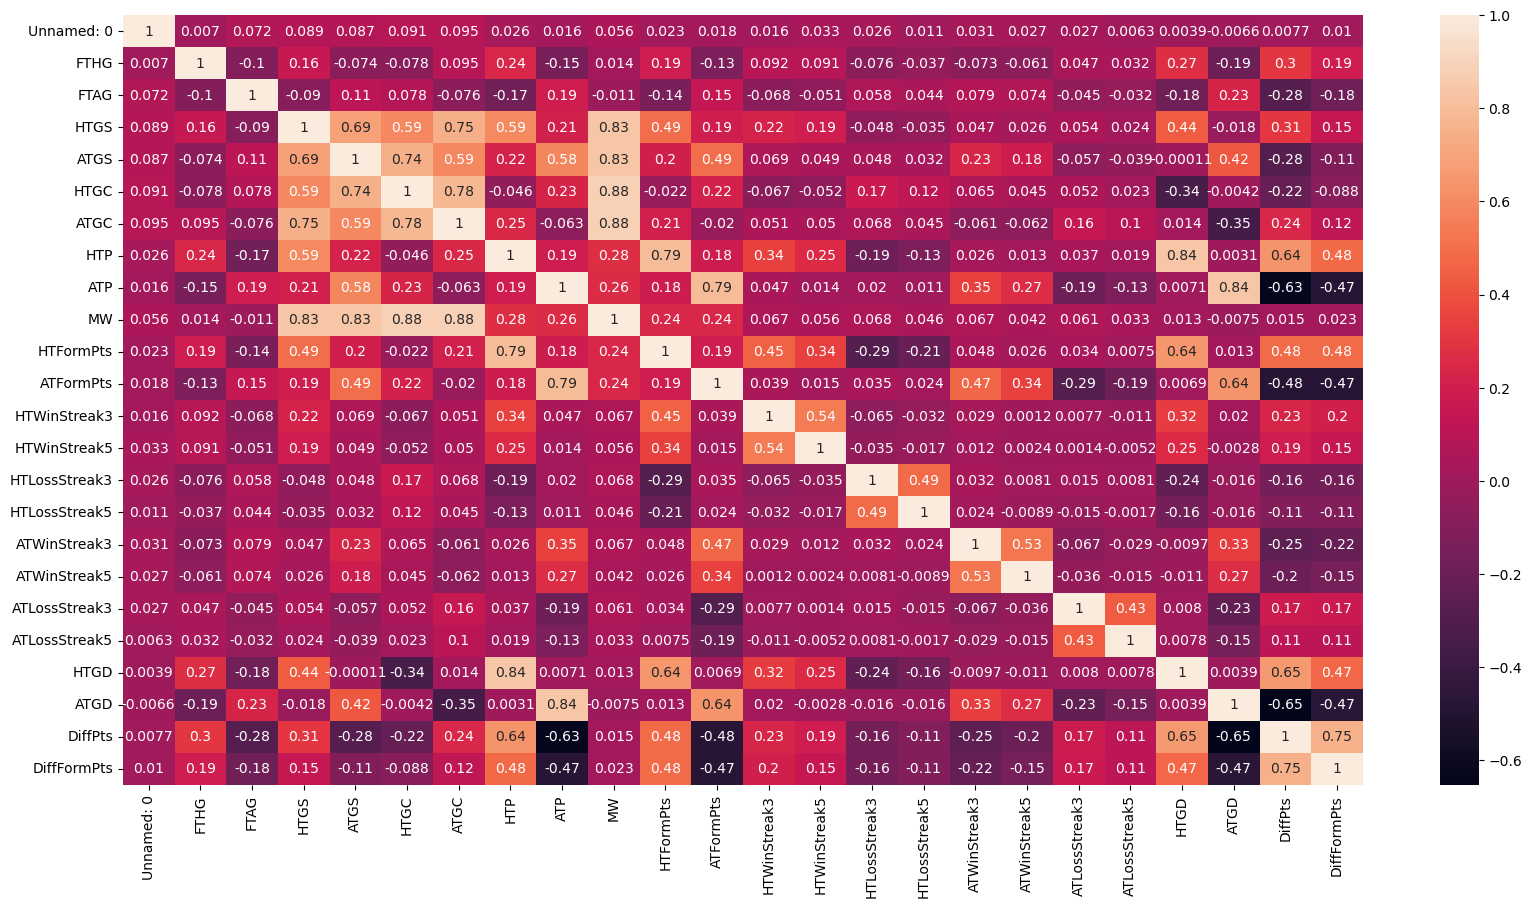

In [80]:
plt.figure(figsize=(20,10))
# Select only numeric columns for correlation
numeric_cols = dataset.select_dtypes(include=[np.number])
sns.heatmap(numeric_cols.corr(), annot=True)
plt.show()

In [174]:
# Remove few column
dataset2 = dataset.copy().drop(columns =['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'HTGS', 'ATGS', 'HTGC', 'ATGC',
       'HM4', 'HM5','AM4', 'AM5', 'MW', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3',
       'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
       'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5',
       'DiffPts'] )

In [176]:
dataset2.keys()

Index(['Unnamed: 0', 'FTR', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'AM1', 'AM2',
       'AM3', 'HTGD', 'ATGD', 'DiffFormPts'],
      dtype='object')

In [177]:
dataset2.tail(20)

,Unnamed: 0,FTR,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts
6820,6820,H,1.702703,1.027027,W,W,L,L,D,L,0.189189,0.108108,0.297297
6821,6821,H,1.702703,1.054054,L,W,W,L,L,D,0.513514,-0.297297,0.243243
6822,6822,H,1.135135,0.324324,W,D,L,D,L,L,-0.135135,-1.540541,0.135135
6823,6823,NH,1.081081,1.675676,W,D,L,D,D,L,-0.459459,0.324324,0.000000
6824,6824,NH,1.486486,1.378378,W,W,W,L,L,W,0.270270,0.027027,0.270270
6825,6825,H,0.594595,0.594595,D,W,L,L,D,L,-1.270270,-1.135135,0.081081
6826,6826,H,1.837838,1.783784,D,L,D,W,D,W,0.891892,0.621622,-0.108108
6827,6827,H,1.486486,2.243243,W,D,W,D,L,W,0.081081,1.243243,-0.054054
6828,6828,H,1.324324,1.108108,W,D,D,L,L,W,-0.054054,-0.351351,-0.081081
6829,6829,H,1.756757,1.432432,D,W,W,L,W,D,0.648649,0.324324,0.135135


In [178]:
#what is the win rate for the home team?

# Total number of matches.
n_matches = dataset2.shape[0]

# Calculate number of features. -1 because we are saving one as the target variable (win/lose/draw)
n_features = dataset2.shape[1] - 1

# Calculate matches won by home team.
n_homewins = len(dataset2[dataset2.FTR == 'H'])

# Calculate win rate for home team.
win_rate = (float(n_homewins) / (n_matches)) * 100

# Print the results
print("Total number of matches: {}".format(n_matches))
print ("Number of features: {}".format(n_features))
print( "Number of matches won by home team: {}".format(n_homewins))
print ("Win rate of home team: {:.2f}%".format(win_rate))

Total number of matches: 6840
Number of features: 12
Number of matches won by home team: 3100
Win rate of home team: 45.32%


array([[<Axes: xlabel='HTGD', ylabel='HTGD'>,
        <Axes: xlabel='ATGD', ylabel='HTGD'>,
        <Axes: xlabel='HTP', ylabel='HTGD'>,
        <Axes: xlabel='ATP', ylabel='HTGD'>,
        <Axes: xlabel='DiffFormPts', ylabel='HTGD'>],
       [<Axes: xlabel='HTGD', ylabel='ATGD'>,
        <Axes: xlabel='ATGD', ylabel='ATGD'>,
        <Axes: xlabel='HTP', ylabel='ATGD'>,
        <Axes: xlabel='ATP', ylabel='ATGD'>,
        <Axes: xlabel='DiffFormPts', ylabel='ATGD'>],
       [<Axes: xlabel='HTGD', ylabel='HTP'>,
        <Axes: xlabel='ATGD', ylabel='HTP'>,
        <Axes: xlabel='HTP', ylabel='HTP'>,
        <Axes: xlabel='ATP', ylabel='HTP'>,
        <Axes: xlabel='DiffFormPts', ylabel='HTP'>],
       [<Axes: xlabel='HTGD', ylabel='ATP'>,
        <Axes: xlabel='ATGD', ylabel='ATP'>,
        <Axes: xlabel='HTP', ylabel='ATP'>,
        <Axes: xlabel='ATP', ylabel='ATP'>,
        <Axes: xlabel='DiffFormPts', ylabel='ATP'>],
       [<Axes: xlabel='HTGD', ylabel='DiffFormPts'>,
        <Axes

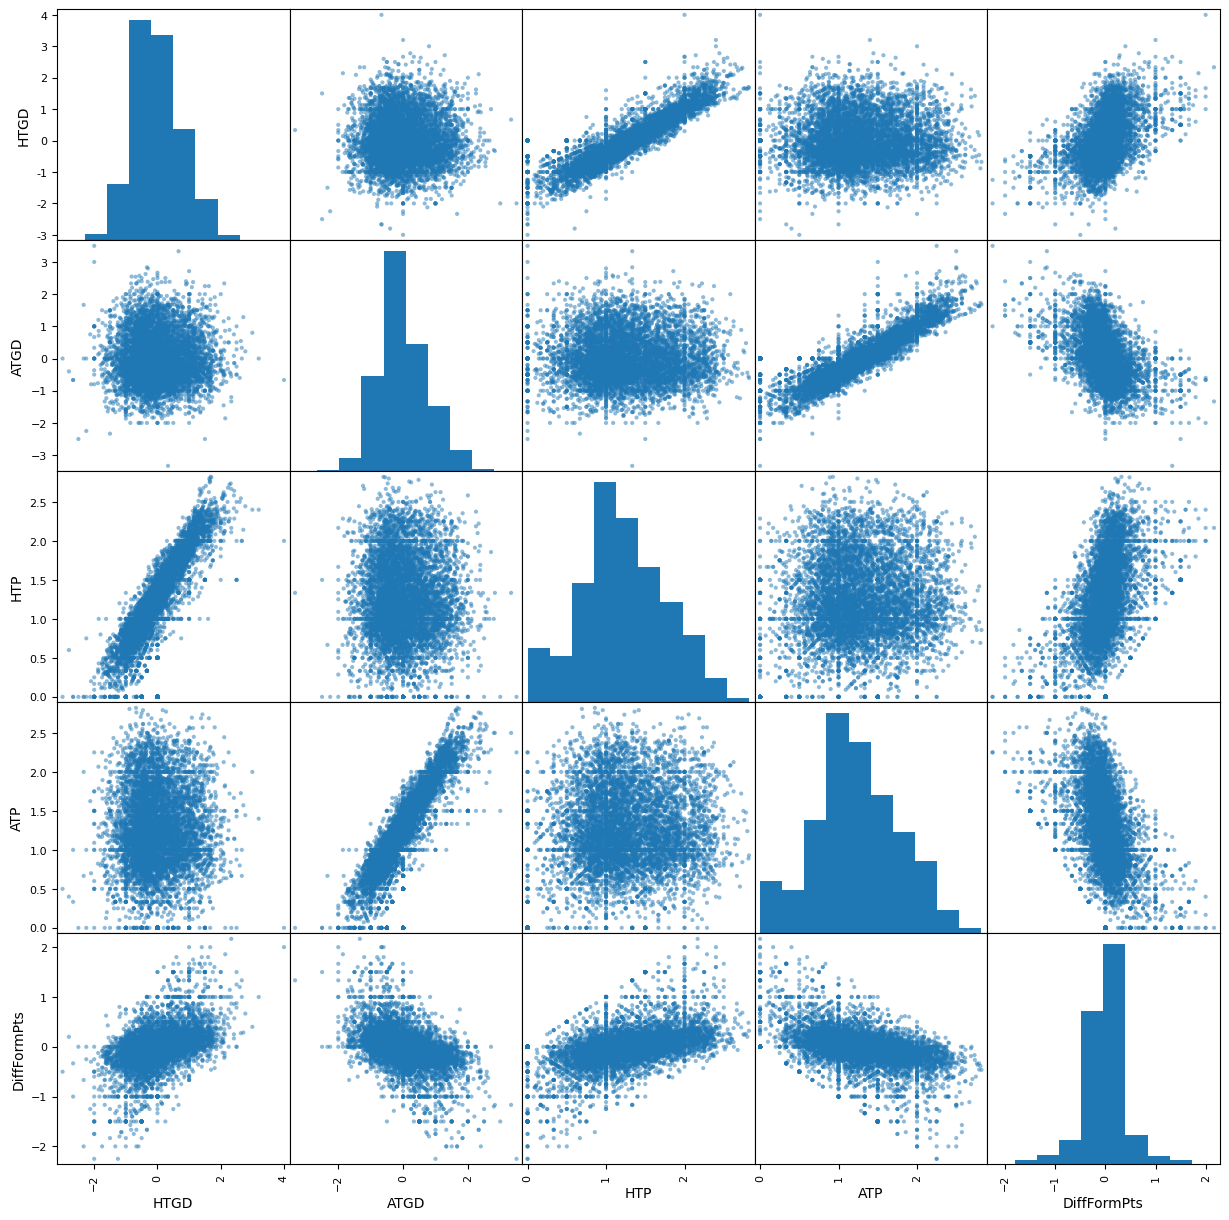

In [179]:
# Visualising distribution of data
from pandas.plotting import scatter_matrix

#the scatter matrix is plotting each of the columns specified against each other column.
#You would have observed that the diagonal graph is defined as a histogram, which means that in the 
#section of the plot matrix where the variable is against itself, a histogram is plotted.

#Scatter plots show how much one variable is affected by another. 
#The relationship between two variables is called their correlation
#negative vs positive correlation

#HTGD - Home team goal difference
#ATGD - away team goal difference
#HTP - Home team points
#ATP - Away team points
#DiffFormPts Diff in points
#DiffLP - Differnece in last years prediction

scatter_matrix(dataset2[['HTGD','ATGD','HTP','ATP','DiffFormPts']], figsize=(15,15))

This code prepares the data for machine learning by separating features from the target variable and standardizing specific numeric features.

## Part 1: Feature-Target Separation

### `X_all = dataset2.drop(['FTR'], axis=1)`

Creates the feature matrix by removing the target variable:
* **X_all**: All columns except 'FTR' (the prediction target)
* **Contains**: HTGD, ATGD, HTP, ATP, DiffFormPts, HM1, HM2, HM3, AM1, AM2, AM3

### `y_all = dataset2['FTR']`

Extracts the target variable:
* **y_all**: Full Time Result column ('H' = Home Win, 'NH' = Not Home Win)
* This is what the model will learn to predict

## Part 2: Feature Standardization (Z-score Normalization)

### `scale(X_all[col])`

Standardizes selected columns to have mean = 0 and standard deviation = 1:

**Formula:** `z = (x - mean) / std_dev`

**Columns standardized:**
* HTGD: Home Team Goal Difference
* ATGD: Away Team Goal Difference
* HTP: Home Team Points
* ATP: Away Team Points

**Example transformation:**
* Original HTP values: [0, 3, 6, 12, 18]
* After scaling: [-1.5, -0.9, -0.3, 0.9, 1.8]

## Purpose

### Why standardize?

* Puts all features on the same scale (prevents features with larger ranges from dominating)
* Required for algorithms sensitive to feature magnitude (Logistic Regression, SVM, Neural Networks)
* Improves model convergence speed and performance

In [180]:
# Separate into feature set and target variable
#FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
X_all = dataset2.drop(['FTR'],axis=1)
y_all = dataset2['FTR']

# Standardising the data.
from sklearn.preprocessing import scale

#Center to the mean and component wise scale to unit variance.
cols = ['HTGD','ATGD','HTP','ATP']
for col in cols:
    X_all[col] = scale(X_all[col])

This code performs one-hot encoding on categorical match form variables to convert them into numeric format suitable for machine learning models.

## Part 1: Convert Form Columns to Strings

Ensures form columns are treated as categorical strings (containing 'W', 'L', 'D', or 'M')

## Part 2: One-Hot Encoding Function

### `preprocess_features(X)`

Creates binary dummy variables from categorical columns:

**How it works:**
1. Creates empty output DataFrame
2. Iterates through each column in X_all
3. If column is categorical (object dtype), converts to dummy variables using `pd.get_dummies()`
4. Joins all columns (numeric + dummy variables) into output DataFrame

**Example transformation:**

| Before | After |
|--------|-------|
| HM1 = 'W' | HM1_W = 1, HM1_L = 0, HM1_D = 0, HM1_M = 0 |
| HM1 = 'L' | HM1_W = 0, HM1_L = 1, HM1_D = 0, HM1_M = 0 |
| HM1 = 'D' | HM1_W = 0, HM1_L = 0, HM1_D = 1, HM1_M = 0 |

## Purpose

### Why one-hot encode?

* ML models require numeric inputs
* Converts categorical values (W/L/D/M) into binary columns
* Each possible value becomes its own column with 1 (present) or 0 (absent)
* Prevents the model from assuming ordinal relationships between categories

In [181]:
#last 3 wins for both sides
X_all.HM1 = X_all.HM1.astype('str')
X_all.HM2 = X_all.HM2.astype('str')
X_all.HM3 = X_all.HM3.astype('str')
X_all.AM1 = X_all.AM1.astype('str')
X_all.AM2 = X_all.AM2.astype('str')
X_all.AM3 = X_all.AM3.astype('str')

#we want continous vars that are integers for our input data, so lets remove any categorical vars
def preprocess_features(X):
    ''' Preprocesses the football data and converts catagorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.items():

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
                    
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print ("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (30 total features):
['Unnamed: 0', 'HTP', 'ATP', 'HM1_D', 'HM1_L', 'HM1_M', 'HM1_W', 'HM2_D', 'HM2_L', 'HM2_M', 'HM2_W', 'HM3_D', 'HM3_L', 'HM3_M', 'HM3_W', 'AM1_D', 'AM1_L', 'AM1_M', 'AM1_W', 'AM2_D', 'AM2_L', 'AM2_M', 'AM2_W', 'AM3_D', 'AM3_L', 'AM3_M', 'AM3_W', 'HTGD', 'ATGD', 'DiffFormPts']


In [182]:
X_all.tail(10)

,Unnamed: 0,HTP,ATP,HM1_D,HM1_L,HM1_M,HM1_W,HM2_D,HM2_L,HM2_M,...,AM2_L,AM2_M,AM2_W,AM3_D,AM3_L,AM3_M,AM3_W,HTGD,ATGD,DiffFormPts
6830,6830,0.322691,-1.036144,False,True,False,False,False,True,False,...,False,False,False,False,False,False,True,0.357747,-1.580346,-0.052632
6831,6831,0.370175,1.014183,False,False,False,True,False,True,False,...,False,False,False,False,False,False,True,0.080060,0.890661,-0.184211
6832,6832,-1.149296,-0.320914,False,True,False,False,False,True,False,...,False,False,True,True,False,False,False,-1.516638,-0.640667,-0.105263
6833,6833,1.747196,0.251271,False,True,False,False,True,False,False,...,False,False,True,True,False,False,False,1.572626,-0.014215,-0.052632
6834,6834,-0.342077,0.918819,False,True,False,False,False,True,False,...,False,False,True,False,False,False,True,-0.405891,0.299012,-0.289474
6835,6835,0.939977,-0.082504,False,True,False,False,False,False,False,...,False,False,True,True,False,False,False,0.774277,-0.118623,0.000000
6836,6836,0.892493,0.918819,False,False,False,True,True,False,False,...,True,False,False,False,False,False,True,0.461879,0.681844,-0.105263
6837,6837,-1.624131,1.157229,False,True,False,False,True,False,False,...,False,False,False,False,True,False,False,-2.037300,1.169085,-0.157895
6838,6838,-0.389561,0.537363,False,True,False,False,False,True,False,...,False,False,True,True,False,False,False,0.080060,0.124997,-0.236842
6839,6839,-0.247110,0.394317,False,True,False,False,False,True,False,...,False,False,True,False,False,False,True,-0.510024,0.299012,-0.157895


In [183]:
from sklearn.model_selection import train_test_split

# Shuffle and split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    test_size = 0.3,
                                                    random_state = 2,
                                                    stratify = y_all)

In [184]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


/home/musty/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [185]:
Y_pred = classifier.predict(X_test)

In [189]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, Y_pred)

In [190]:
cm

array([[514, 416],
       [319, 803]])

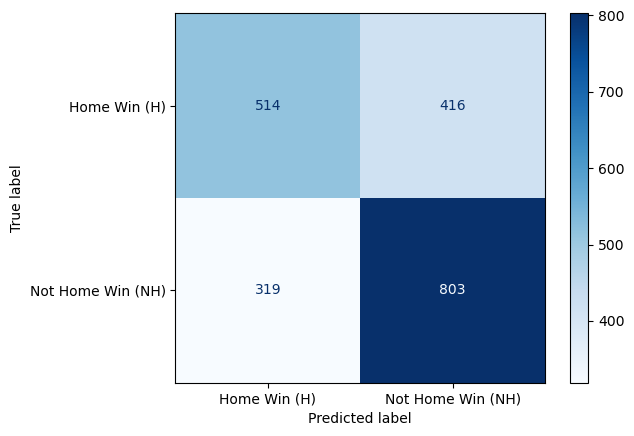

In [191]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    y_test, Y_pred,
    display_labels=['Home Win (H)', 'Not Home Win (NH)'],
    cmap='Blues'
)
plt.show()

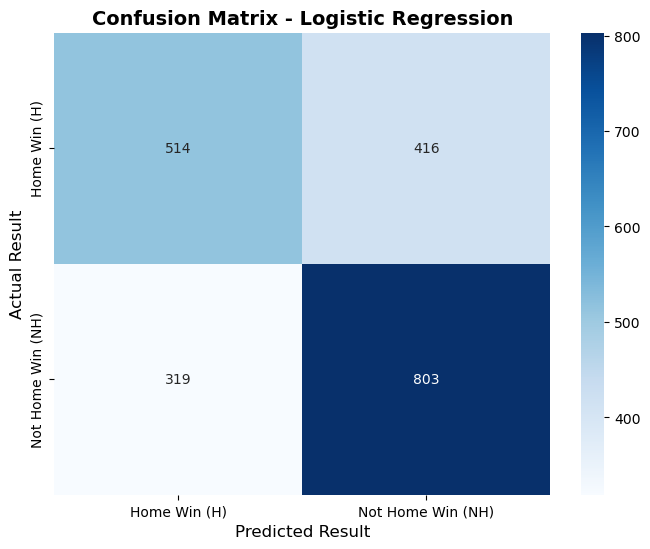

In [192]:
plt.figure(figsize=(8, 6))

# Create heatmap with labels
sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=['Home Win (H)', 'Not Home Win (NH)'],  # H first, NH second
            yticklabels=['Home Win (H)', 'Not Home Win (NH)'],  # H first, NH second
            cmap='Blues')

# Add titles and labels
plt.title('Confusion Matrix - Logistic Regression', fontsize=14, fontweight='bold')
plt.ylabel('Actual Result', fontsize=12)
plt.xlabel('Predicted Result', fontsize=12)

plt.show()

In [193]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           H       0.62      0.55      0.58       930
          NH       0.66      0.72      0.69      1122

    accuracy                           0.64      2052
   macro avg       0.64      0.63      0.63      2052
weighted avg       0.64      0.64      0.64      2052



In [205]:
#fitting the SVM to the training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [206]:
#predicting result
Y_pred = classifier.predict(X_test)

In [207]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)

In [208]:
cm

array([[   0,  930],
       [   0, 1122]])

Text(0.5, 36.72222222222221, 'Predicted Result')

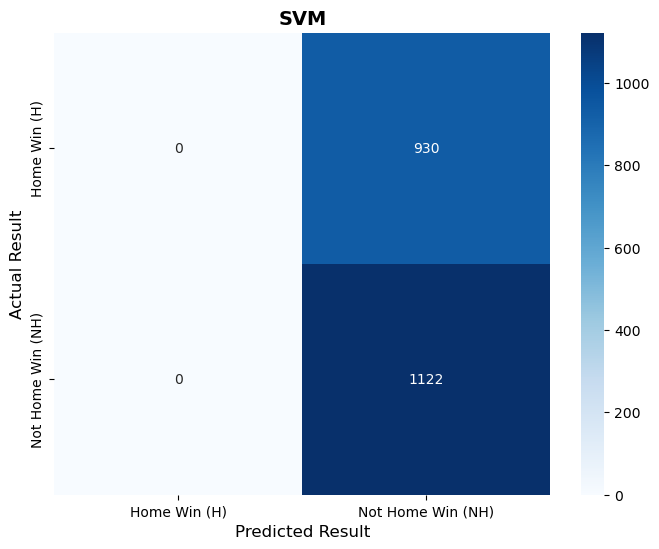

In [210]:

plt.figure(figsize=(8, 6))

# Create heatmap with labels
sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=['Home Win (H)', 'Not Home Win (NH)'],  # H first, NH second
            yticklabels=['Home Win (H)', 'Not Home Win (NH)'],  # H first, NH second
            cmap='Blues')

# Add titles and labels
plt.title('SVM', fontsize=14, fontweight='bold')
plt.ylabel('Actual Result', fontsize=12)
plt.xlabel('Predicted Result', fontsize=12)

In [211]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           H       0.00      0.00      0.00       930
          NH       0.55      1.00      0.71      1122

    accuracy                           0.55      2052
   macro avg       0.27      0.50      0.35      2052
weighted avg       0.30      0.55      0.39      2052



/home/musty/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/musty/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/musty/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [212]:
# Fitting Naive Bayes to the training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [213]:
# Predicting results
Y_pred = classifier.predict(X_test)

In [214]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)

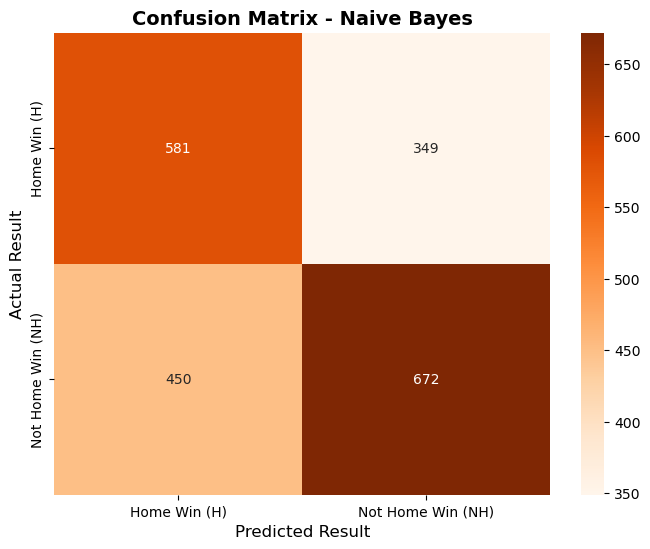

In [217]:
plt.figure(figsize=(8, 6))

# Create heatmap with labels
sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=['Home Win (H)', 'Not Home Win (NH)'],  # H first, NH second
            yticklabels=['Home Win (H)', 'Not Home Win (NH)'],  # H first, NH second
            cmap='Oranges')

# Add titles and labels
plt.title('Confusion Matrix - Naive Bayes', fontsize=14, fontweight='bold')
plt.ylabel('Actual Result', fontsize=12)
plt.xlabel('Predicted Result', fontsize=12)

plt.show()

In [218]:
# Classification Report for Naive Bayes
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           H       0.56      0.62      0.59       930
          NH       0.66      0.60      0.63      1122

    accuracy                           0.61      2052
   macro avg       0.61      0.61      0.61      2052
weighted avg       0.62      0.61      0.61      2052



In [222]:
# Fitting the RANDOM FOREST to the training set
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='sqrt',  # Changed from 'auto' to 'sqrt'
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
classifier.fit(X_train, y_train)

,n_estimators,700
,criterion,'gini'
,max_depth,None
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [223]:
#predicting result
Y_pred = classifier.predict(X_test)

In [224]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)

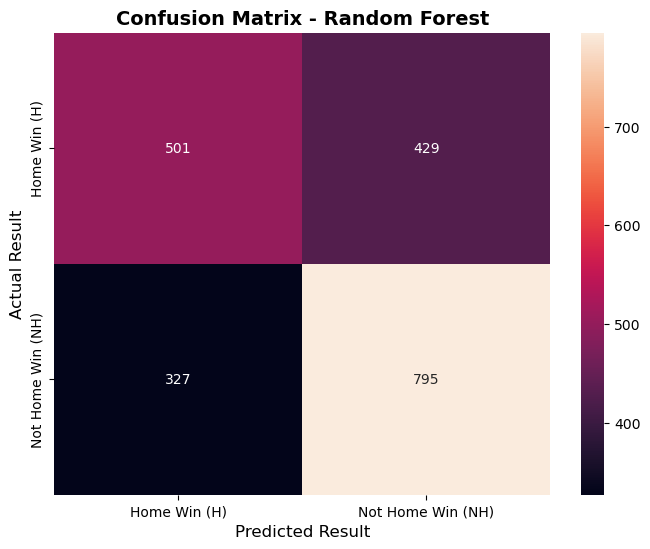

In [225]:
plt.figure(figsize=(8, 6))

# Create heatmap with labels
sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=['Home Win (H)', 'Not Home Win (NH)'],  # H first, NH second
            yticklabels=['Home Win (H)', 'Not Home Win (NH)'],  # H first, NH second
            )

# Add titles and labels
plt.title('Confusion Matrix - Random Forest', fontsize=14, fontweight='bold')
plt.ylabel('Actual Result', fontsize=12)
plt.xlabel('Predicted Result', fontsize=12)

plt.show()

In [226]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           H       0.61      0.54      0.57       930
          NH       0.65      0.71      0.68      1122

    accuracy                           0.63      2052
   macro avg       0.63      0.62      0.62      2052
weighted avg       0.63      0.63      0.63      2052



## Neural Network

In [227]:
# Remove the Unnamed column from both training and test sets
X_train = X_train.drop('Unnamed: 0', axis=1)  # or whatever the exact name is
X_test = X_test.drop('Unnamed: 0', axis=1)

# Verify the shape is now correct
print(f"X_train shape after dropping: {X_train.shape}")
print(f"X_test shape after dropping: {X_test.shape}")

X_train shape after dropping: (4788, 29)
X_test shape after dropping: (2052, 29)


In [228]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [229]:
# Build the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(29,)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

/home/musty/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [230]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

In [231]:
# Convert string labels to numeric
# 'H' (Home Win) -> 1, 'NH' (Not Home Win) -> 0
y_train_encoded = (y_train == 'H').astype(int).values  # Convert to NumPy array
y_test_encoded = (y_test == 'H').astype(int).values    # Convert to NumPy array

print(f"Original labels: {y_train.unique()}")
print(f"Encoded - H becomes: 1, NH becomes: 0")
print(f"Training set shape: {y_train_encoded.shape}")
print(f"Data type: {type(y_train_encoded)}")

Original labels: ['H' 'NH']
Encoded - H becomes: 1, NH becomes: 0
Training set shape: (4788,)
Data type: <class 'numpy.ndarray'>


In [152]:
# Convert boolean columns to integers for TensorFlow compatibility
X_train_clean = X_train.copy()
X_test_clean = X_test.copy()

# Convert all boolean columns to int
bool_columns = X_train_clean.select_dtypes(include=['bool']).columns
for col in bool_columns:
    X_train_clean[col] = X_train_clean[col].astype(int)
    X_test_clean[col] = X_test_clean[col].astype(int)

# Now convert to NumPy arrays with proper dtype
X_train_array = X_train_clean.values.astype('float32')
X_test_array = X_test_clean.values.astype('float32')

print(f"X_train shape: {X_train_array.shape}, dtype: {X_train_array.dtype}")
print(f"y_train shape: {y_train_encoded.shape}, dtype: {y_train_encoded.dtype}")



X_train shape: (4788, 29), dtype: float32
y_train shape: (4788,), dtype: int64


In [232]:
X_train_clean.head()

,HTP,ATP,HM1_D,HM1_L,HM1_M,HM1_W,HM2_D,HM2_L,HM2_M,HM2_W,...,AM2_L,AM2_M,AM2_W,AM3_D,AM3_L,AM3_M,AM3_W,HTGD,ATGD,DiffFormPts
4840,0.045977,-0.541237,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,-0.307743,-0.743876,0.068966
6111,0.061532,-1.775215,1,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0.999897,-1.336726,1.000000
4011,0.020524,1.395639,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,-0.409047,1.608867,-0.045455
4081,0.045977,-0.228838,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,-0.034844,-0.470253,-0.103448
4232,-1.592476,1.697625,0,1,0,0,0,1,0,0,...,0,0,1,1,0,0,0,-1.308373,2.410389,-1.833333


In [233]:
# Rebuild the model from scratch
model_nn = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(29,)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_nn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

print("\nModel built and compiled successfully!")

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with clean NumPy arrays
history = model_nn.fit(
    X_train_array, y_train_encoded,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

/home/musty/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Model built and compiled successfully!
Epoch 1/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5499 - loss: 0.6923 - precision_5: 0.5587 - recall_5: 0.1561 - val_accuracy: 0.6649 - val_loss: 0.6258 - val_precision_5: 0.6787 - val_recall_5: 0.5136
Epoch 2/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6266 - loss: 0.6442 - precision_5: 0.6163 - recall_5: 0.4728 - val_accuracy: 0.6816 - val_loss: 0.6087 - val_precision_5: 0.6819 - val_recall_5: 0.5750
Epoch 3/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6193 - loss: 0.6445 - precision_5: 0.6054 - recall_5: 0.4687 - val_accuracy: 0.6858 - val_loss: 0.6043 - val_precision_5: 0.6759 - val_recall_5: 0.6068
Epoch 4/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6432 - loss: 0.6312 - precision_5: 0.6106 - recall_5: 0.5019 - val_accuracy: 0.6775 - val_loss: 0.6056 - val_precision_5: 0.6825 - val_recall_5: 0.5568
Epoch 5/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6489 - loss: 0

In [236]:
# Evaluate the model
test_loss, test_accuracy, test_precision, test_recall = model_nn.evaluate(X_test_array, y_test_encoded, verbose=0)

print(f"\nTest Results:")
print(f"Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")

# Make predictions
y_pred_prob = model_nn.predict(X_test_array, verbose=0)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Convert back to original labels for confusion matrix
Y_pred_labels = ['H' if pred == 1 else 'NH' for pred in y_pred]


Test Results:
Accuracy: 0.6321 (63.21%)
Precision: 0.6079
Recall: 0.5301


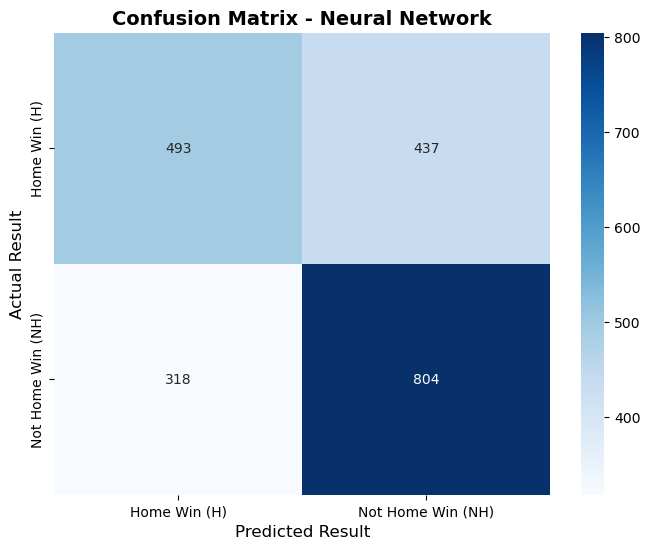

In [237]:
# Create confusion matrix for Neural Network
cm = confusion_matrix(y_test, Y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=['Home Win (H)', 'Not Home Win (NH)'],  # H first, NH second
            yticklabels=['Home Win (H)', 'Not Home Win (NH)'],  # H first, NH second,
            cmap='Blues')

plt.title('Confusion Matrix - Neural Network', fontsize=14, fontweight='bold')
plt.ylabel('Actual Result', fontsize=12)
plt.xlabel('Predicted Result', fontsize=12)
plt.show()

In [238]:
# Print classification report
print(classification_report(y_test, Y_pred_labels))

              precision    recall  f1-score   support

           H       0.61      0.53      0.57       930
          NH       0.65      0.72      0.68      1122

    accuracy                           0.63      2052
   macro avg       0.63      0.62      0.62      2052
weighted avg       0.63      0.63      0.63      2052



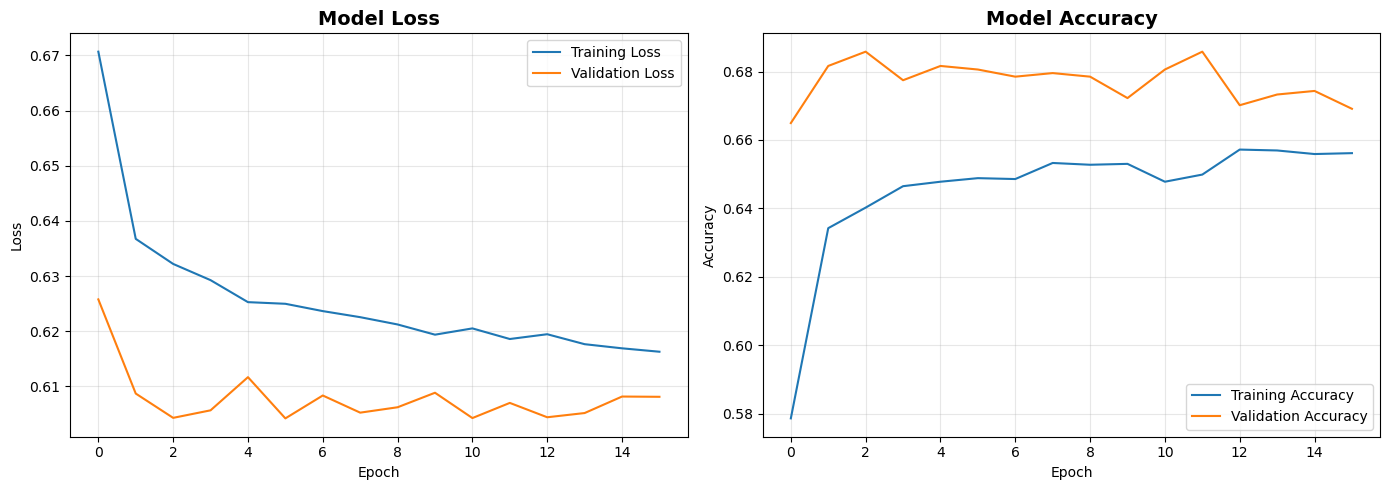

In [239]:
# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot loss
axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Model Loss', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot accuracy
axes[1].plot(history.history['accuracy'], label='Training Accuracy')
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_title('Model Accuracy', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Wide & Deep Neural Network

This architecture combines:
- **Wide component**: Direct connections from input to output (captures memorization and feature interactions)
- **Deep component**: Multiple hidden layers (captures generalization and complex patterns)

**Benefits over simple feedforward:**
- Better at learning both simple rules and complex patterns
- Wide path handles feature crosses and interactions
- Deep path learns abstract representations
- Often achieves 1-3% better accuracy than simple networks

In [240]:
# Build Wide & Deep Model using Functional API
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense, Dropout, concatenate

# Input layer
input_layer = Input(shape=(29,), name='input')

# DEEP COMPONENT - Multiple hidden layers for complex patterns
deep = Dense(64, activation='relu', name='deep_1')(input_layer)
deep = Dropout(0.3)(deep)
deep = Dense(32, activation='relu', name='deep_2')(deep)
deep = Dropout(0.3)(deep)
deep = Dense(16, activation='relu', name='deep_3')(deep)

# WIDE COMPONENT - Direct connection from input
wide = Dense(8, activation='relu', name='wide')(input_layer)

# COMBINE both paths
combined = concatenate([deep, wide], name='combined')

# Output layer
output = Dense(1, activation='sigmoid', name='output')(combined)

# Create the model
model_wide_deep = Model(inputs=input_layer, outputs=output, name='wide_deep_model')

# Compile
model_wide_deep.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Display model architecture
print("\n" + "="*60)
print("WIDE & DEEP NEURAL NETWORK ARCHITECTURE")
print("="*60)
model_wide_deep.summary()
print("="*60)


WIDE & DEEP NEURAL NETWORK ARCHITECTURE


Model: "wide_deep_model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)  │ (None, 29)        │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ deep_1 (Dense)      │ (None, 64)        │      1,920 │ input[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_12          │ (None, 64)        │          0 │ deep_1[0][0]      │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ deep_2 (Dense)      │ (None, 32)        │      2,080 │ dropout_12[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_13          │ (None, 32)        │          0 │ deep_2[0][0]      │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ deep_3 (Dense)      │ (None, 16)        │        528 │ dropout_13[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wide (Dense)        │ (None, 8)         │        240 │ input[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ combined            │ (None, 24)        │          0 │ deep_3[0][0],     │
│ (Concatenate)       │                   │            │ wide[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │         25 │ combined[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 4,793 (18.72 KB)

 Trainable params: 4,793 (18.72 KB)

 Non-trainable params: 0 (0.00 B)

In [241]:
# Train the Wide & Deep Model
early_stop_wd = EarlyStopping(
    monitor='val_loss', 
    patience=15,  # More patience for wide-deep convergence
    restore_best_weights=True,
    verbose=1
)

print("Training Wide & Deep Neural Network...")
print("-" * 60)

history_wd = model_wide_deep.fit(
    X_train_array, y_train_encoded,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop_wd],
    verbose=1
)

print("\n" + "="*60)
print("Training Complete!")
print("="*60)

Training Wide & Deep Neural Network...
------------------------------------------------------------
Epoch 1/100


120/120 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.6238 - loss: 0.6511 - precision_6: 0.5916 - recall_6: 0.5371 - val_accuracy: 0.6628 - val_loss: 0.6156 - val_precision_6: 0.6657 - val_recall_6: 0.5341
Epoch 2/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6352 - loss: 0.6328 - precision_6: 0.6122 - recall_6: 0.5246 - val_accuracy: 0.6649 - val_loss: 0.6081 - val_precision_6: 0.6562 - val_recall_6: 0.5682
Epoch 3/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6296 - loss: 0.6305 - precision_6: 0.6007 - recall_6: 0.5108 - val_accuracy: 0.6712 - val_loss: 0.6095 - val_precision_6: 0.6590 - val_recall_6: 0.5886
Epoch 4/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6598 - loss: 0.6177 - precision_6: 0.6434 - recall_6: 0.5466 - val_accuracy: 0.6649 - val_loss: 0.6089 - val_precision_6: 0.6639 - val_recall_6: 0.5477
Epoch 5/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6435 - loss: 0.6179 - precision_6: 0.6280 - recall_6: 0.5293 - va

In [242]:
# Evaluate Wide & Deep Model
test_loss_wd, test_accuracy_wd, test_precision_wd, test_recall_wd = model_wide_deep.evaluate(
    X_test_array, y_test_encoded, verbose=0
)

print("\n" + "="*60)
print("WIDE & DEEP MODEL - TEST RESULTS")
print("="*60)
print(f"Accuracy:  {test_accuracy_wd:.4f} ({test_accuracy_wd*100:.2f}%)")
print(f"Precision: {test_precision_wd:.4f}")
print(f"Recall:    {test_recall_wd:.4f}")
print(f"Loss:      {test_loss_wd:.4f}")
print("="*60)

# Make predictions
y_pred_prob_wd = model_wide_deep.predict(X_test_array, verbose=0)
y_pred_wd = (y_pred_prob_wd > 0.5).astype(int).flatten()

# Convert to labels
Y_pred_labels_wd = ['H' if pred == 1 else 'NH' for pred in y_pred_wd]

print(f"\nPrediction distribution:")
print(f"  Predicted H:  {sum(y_pred_wd)} ({sum(y_pred_wd)/len(y_pred_wd)*100:.1f}%)")
print(f"  Predicted NH: {len(y_pred_wd) - sum(y_pred_wd)} ({(len(y_pred_wd) - sum(y_pred_wd))/len(y_pred_wd)*100:.1f}%)")


WIDE & DEEP MODEL - TEST RESULTS
Accuracy:  0.6345 (63.45%)
Precision: 0.6056
Recall:    0.5548
Loss:      0.6290

Prediction distribution:
  Predicted H:  852 (41.5%)
  Predicted NH: 1200 (58.5%)


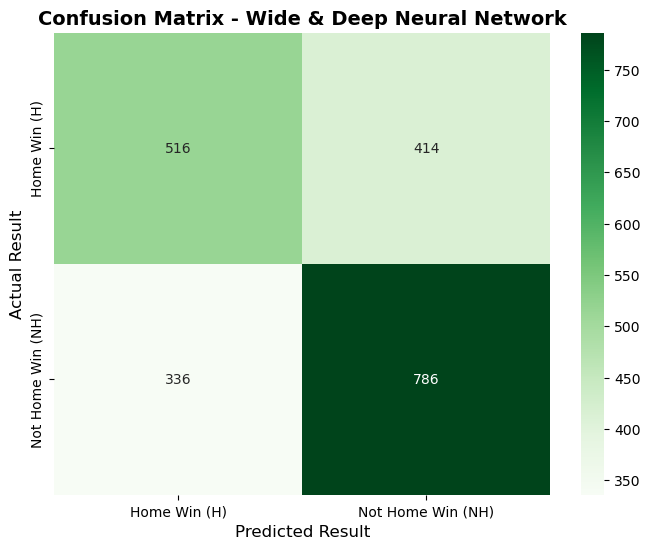

In [243]:
# Confusion Matrix for Wide & Deep Model
cm_wd = confusion_matrix(y_test, Y_pred_labels_wd)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_wd, annot=True, fmt='d', 
            xticklabels=['Home Win (H)', 'Not Home Win (NH)'],  # H first, NH second
            yticklabels=['Home Win (H)', 'Not Home Win (NH)'],  # H first, NH second
            cmap='Greens')

plt.title('Confusion Matrix - Wide & Deep Neural Network', fontsize=14, fontweight='bold')
plt.ylabel('Actual Result', fontsize=12)
plt.xlabel('Predicted Result', fontsize=12)
plt.show()

In [244]:
# Classification Report for Wide & Deep
print("="*60)
print("WIDE & DEEP MODEL - CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_test, Y_pred_labels_wd))
print("="*60)

WIDE & DEEP MODEL - CLASSIFICATION REPORT
              precision    recall  f1-score   support

           H       0.61      0.55      0.58       930
          NH       0.66      0.70      0.68      1122

    accuracy                           0.63      2052
   macro avg       0.63      0.63      0.63      2052
weighted avg       0.63      0.63      0.63      2052



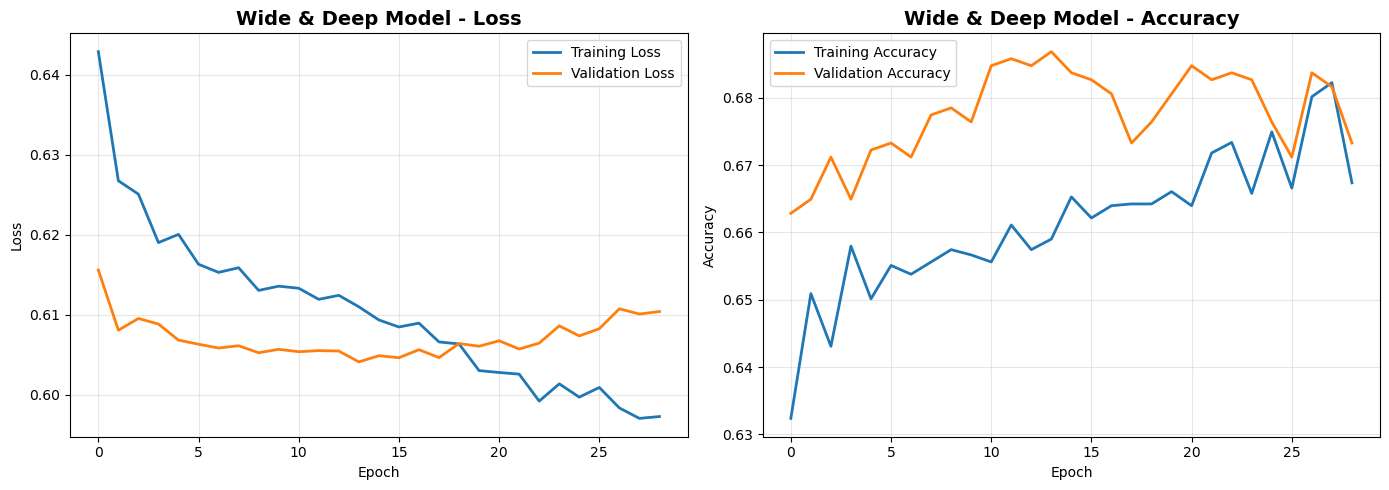

In [245]:
# Plot Wide & Deep Training History
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot loss
axes[0].plot(history_wd.history['loss'], label='Training Loss', linewidth=2)
axes[0].plot(history_wd.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_title('Wide & Deep Model - Loss', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot accuracy
axes[1].plot(history_wd.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[1].plot(history_wd.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[1].set_title('Wide & Deep Model - Accuracy', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [161]:
# Compare all models side-by-side
import pandas as pd

comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM (RBF)', 'Random Forest', 
              'Simple Feedforward NN', 'Wide & Deep NN'],
    'Accuracy': [0.6300, 0.5500, 0.0000, test_accuracy, test_accuracy_wd],  # Update Random Forest if you have it
    'Precision (H)': [0.61, 0.00, 0.00, test_precision, test_precision_wd],
    'Recall (H)': [0.54, 0.00, 0.00, test_recall, test_recall_wd]
})

# Format percentages
comparison_df['Accuracy %'] = (comparison_df['Accuracy'] * 100).round(2)
comparison_df['Precision %'] = (comparison_df['Precision (H)'] * 100).round(2)
comparison_df['Recall %'] = (comparison_df['Recall (H)'] * 100).round(2)

print("\n" + "="*80)
print("MODEL COMPARISON SUMMARY")
print("="*80)
print(comparison_df[['Model', 'Accuracy %', 'Precision %', 'Recall %']].to_string(index=False))
print("="*80)

# Find best model
best_idx = comparison_df['Accuracy'].idxmax()
print(f"\n🏆 BEST MODEL: {comparison_df.loc[best_idx, 'Model']}")
print(f"   Accuracy: {comparison_df.loc[best_idx, 'Accuracy %']:.2f}%")
print("="*80)


MODEL COMPARISON SUMMARY
                Model  Accuracy %  Precision %  Recall %
  Logistic Regression       63.00        61.00     54.00
            SVM (RBF)       55.00         0.00      0.00
        Random Forest        0.00         0.00      0.00
Simple Feedforward NN       63.35        60.72     54.19
       Wide & Deep NN       64.18        62.61     52.04

🏆 BEST MODEL: Wide & Deep NN
   Accuracy: 64.18%
